In [1]:
import sys
workPath = '/home/jovyan/workspace'
if not workPath in sys.path:
    sys.path.append(workPath)

In [2]:
from planetengine import initials
from planetengine import systems
from planetengine import functions as pfn
from planetengine.visualisation import quickShow
from planetengine import message
import numpy as np
import math
from timeit import timeit
from planetengine.tests import testsystems

system = testsystems.get_system(Ra = 1e4, res = 32)

variable1 = pfn.convert(system.velocityField, 'velocity')
variable2 = pfn.convert(system.temperatureField, 'temperature')
constant = pfn.convert(2.)
shape = pfn.convert(np.array([[0.2, 0.1], [0.9, 0.3], [0.8, 0.7], [0.4, 0.9]]))
vanilla = pfn.convert(system.viscosityFn, 'viscosity')

Fitted 1 variables to the figure.


In [3]:
makeFns = [
    lambda var: var ** constant,
    lambda var: pfn.Region(var, shape),
    lambda var: var * variable1,
    lambda var: pfn.Component.rad(var),
    lambda var: pfn.Operations.log(var),
    lambda var: pfn.Gradient.mag(var),
    lambda var: pfn.HandleNaN.zeroes(var),
    lambda var: var + 1.,
    lambda var: var * vanilla,
    lambda var: pfn.Quantiles.terciles(var),
    lambda var: pfn.Substitute(var, 2., 0.),
    lambda var: pfn.Binarise(var),
    lambda var: var * variable1,
    lambda var: pfn.Merge(*[
        compVar * -1. \
            for compVar in pfn.Split.getall(var)
        ]),
    lambda var: pfn.Component.rad(var),
    lambda var: pfn.Gradient.ang(var),
    lambda var: pfn.Normalise(var, [1., 2.]),
    lambda var: pfn.Clip.torange(var, [1.2, 1.8]),
    lambda var: pfn.HandleNaN(var, 1.6),
    lambda var: pfn.Filter(var, 1.6),
    lambda var: pfn.Region(var, shape),
    lambda var: pfn.HandleNaN.zeroes(var),
    lambda var: pfn.Binarise(var)
    ]

0.041
0.507
0.037
0.038
0.036
0.16
0.195
0.093
0.041
0.698
0.244
0.198
0.039
0.422
0.039
0.141
0.377
0.297
0.193
0.226
0.469
0.217
0.21
4.915
Fitted 1 variables to the figure.
Binarise{HandleNaN{Region{Filter{HandleNaN{Clip_both=null{Normalise{Component_component=ang{Gradient{Projection{Component_component=rad{Merge{Operation_uwop=multiply{Split_column=0{Operation_uwop=multiply{Binarise{Substitute{Quantiles_ntiles=3{Operation_uwop=multiply{Operation_uwop=add{HandleNaN{Component_component=mag{Gradient{Projection{Operation_uwop=log{Component_component=rad{Operation_uwop=multiply{Region{Operation_uwop=pow{Variable_varName=temperature{};Constant_val=arr{[ 2.]}{}};Shape_varName=anon{}};Variable_varName=velocity{}}}}}}};Constant_val=arr{[ 0.]}{}};Constant_val=arr{[ 1.]}{}};Variable_varName=viscosity{}}};Constant_val=arr{[ 2.]}{};Constant_val=arr{[ 0.]}{}}};Variable_varName=velocity{}}};Constant_val=arr{[-1.]}{}};Operation_uwop=multiply{Split_column=1{Operation_uwop=multiply{Binarise{Substitu


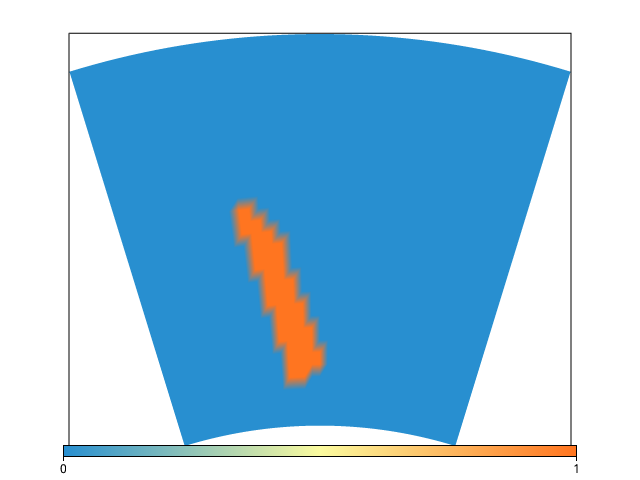

In [4]:
var = variable2
timings = []
for makeFn in makeFns:
    timing = timeit(lambda: makeFn(var), number = 3) / 3.
    timings.append(timing)
    var = makeFn(var)
    message(var, round(timing, 3))
message(round(sum(timings), 3))
quickShow(var)

In [5]:
def testfn(var, timings = '', layer = 1):
    def outer_timefn(var, timinglist = []):
        system.reset()
        var.update()
        system.iterate()
        timing = timeit(var.update, number = 1)
        timinglist.append(timing)
        return timinglist
    var_timings = []
    for i in range(3):
        var_timings = outer_timefn(var, var_timings)
    var_timing = sum(var_timings) / len(var_timings)
    var_timing = round(var_timing, 6)
    timings += '\n'
    newrow = ''
    newrow += layer * '-' + ' '
    newrow += var.opTag
    newrow += ': '
    newrow += '.' * (56 - len(newrow)) + ' '
    newrow += str(var_timing)
    timings += newrow
    for inVar in var.inVars:
        timings = testfn(inVar, timings, layer + 1)
    return timings

timings = testfn(var)

message(timings)

red = pfn.Integral(var)

system.reset()
red.update()
system.iterate()
message(red.evaluate())
message(red.evaluate())
system.iterate()
message(red.evaluate())
message(red.evaluate())

def testfn():
    freshsteps = []
    stalesteps = []
    for i in range(3):
        system.reset()
        red.update
        system.iterate()
        freshsteps.append(timeit(red.update, number = 1))
    for i in range(3):
        stalesteps.append(timeit(red.update, number = 1))
    average_fresh = round(sum(freshsteps) / len(freshsteps), 5)
    average_stale = round(sum(stalesteps) / len(stalesteps), 5)
    ratio = round(average_fresh / average_stale, 5)
    return(average_fresh, average_stale, ratio)

message(testfn())


- Binarise: ............................................ 0.149355
-- HandleNaN: .......................................... 0.165552
--- Region: ............................................ 0.168647
---- Filter: ........................................... 0.180506
----- HandleNaN: ....................................... 0.176443
------ Clip_both=null: ................................. 0.189147
------- Normalise: ..................................... 0.189425
-------- Component_component=ang: ...................... 0.21104
--------- Gradient: .................................... 0.216546
---------- Projection: ................................. 0.219231
----------- Component_component=rad: ................... 0.136007
------------ Merge: .................................... 0.13794
------------- Operation_uwop=multiply: ................. 0.121053
-------------- Split_column=0: ......................... 0.12938
--------------- Operation_uwop=multiply: ............... 0.112352
------------